## **Sentiment Analysis for Mental Health Data**
#### An approach towards enhancing patient - psychologist interaction
---



KEYUR_PARKHI

GOURISH_SALGAONKAR

DEV_VATNANI

---



## **Role of Sentiment Analysis in this scenario**
A psychologist should assess the patient’s emotional state before applying a treatment. Therapy should be personalized to ensure that the intervention matches the individual's needs rather than following a one-size-fits-all approach.

---

## **Objectives:**


*   Perform sentiment analysis on mental health conversations between patient and psychologist.
*   Improve patient - psychologist interactions through NLP techniques

---


## **Approach:**


*   Perform necessary text data preprocessing.

*   Define sentiment labels ("positive", "negative", "neutral") according to the relevant words found.
*   Apply the labels to the unsupervised text dataset to convert it into supervised text dataset suitable for applying classification algorithms like Logistic Regression, Support Vector Machines Classifier and Naive Bayes Classifier.


*   Perform TF-IDF Vectorization of the text data after train-test split.


*   Identify the best evaluation metric and the best model that could be used for classification.
*   Provide suggestions that can be implemented to improve patient - psychologist interactions.


---


#### **Dataset Information:** This dataset consists of 3512 observations with 2 features ("Context" and "Response")
#### To view the complete dataset : [DATA](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fthedevastator%2Fnlp-mental-health-conversations)

---

### **Attribute Information:**

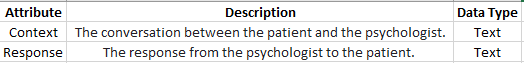
---

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

In [2]:
# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
df = pd.read_csv("/content/train.csv").dropna()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
# First 5 rows of the dataset
df.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see..."
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...


In [4]:
# To understand the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3508 entries, 0 to 3511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   3508 non-null   object
 1   Response  3508 non-null   object
dtypes: object(2)
memory usage: 82.2+ KB


In [5]:
# To obtain no of unique entries in Context column
unique_contexts = df['Context'].nunique()
print(f"Number of unique entries in the 'Context' column: {unique_contexts}")

# To obtain no of unique entries in Response column
unique_responses = df['Response'].nunique()
print(f"Number of unique entries in the 'Response' column: {unique_responses}")

Number of unique entries in the 'Context' column: 995
Number of unique entries in the 'Response' column: 2479


In [6]:
# Missing value counts for each column
print(df.isnull().sum())

Context     0
Response    0
dtype: int64


There are no missing values in this dataset.

In [8]:
# Define sentiment labels
def assign_label(context):
    if any(word in context.lower() for word in ['happy', 'great', 'good', 'support', 'hope']):
        return 'positive'
    elif any(word in context.lower() for word in ['bad', 'sad', 'depress', 'angry', 'frustrated', 'hopeless']):
        return 'negative'
    else:
        return 'neutral'

df['label'] = df['Context'].apply(assign_label)
print(df['label'].value_counts(normalize=True))

label
neutral     0.691277
negative    0.183580
positive    0.125143
Name: proportion, dtype: float64


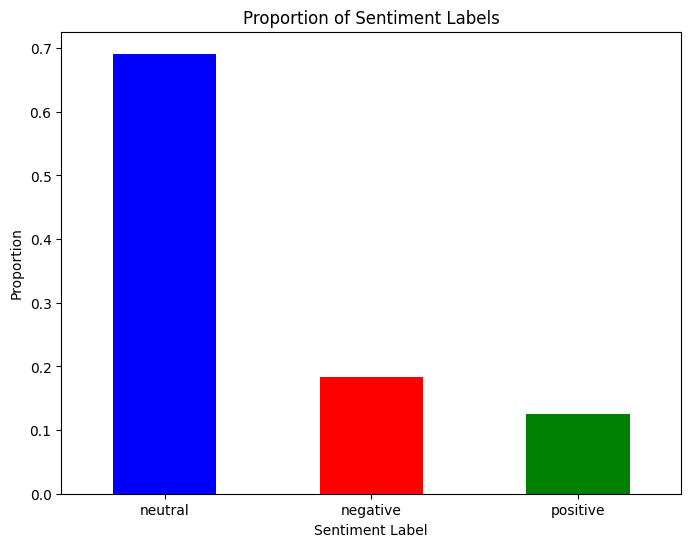

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['label'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'red', 'green'])
plt.title('Proportion of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

After applying labels to the entire dataset, it can be inferred that we are dealing with an imbalanced dataset.

## **Data Preprocessing:**

*   Lower-casing

*   Removing Punctuations
*   Removing Digits


*  Lemmatization



In [ ]:
# Text Preprocessing with Lemmatization
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    return " ".join(lemmatized_words)

df['cleaned_text'] = df['Context'].apply(preprocess_text)
df["cleaned_text"].head()

,cleaned_text
0,im go through some things with my feelings and...
1,im go through some things with my feelings and...
2,im go through some things with my feelings and...
3,im go through some things with my feelings and...
4,im go through some things with my feelings and...


Splitting the data into training and testing sets with a 80 : 20 ratio

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

## **TF-IDF Vectorization**

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)



*   Creates a TF-IDF vectorizer that will transform text into numerical features.

*   Learns the vocabulary from X_train (training text data).
*   Converts X_train into a matrix of TF-IDF scores.


*   Uses the vocabulary learned from X_train to transform X_test (test text data) into TF-IDF scores (without learning new words).



## **Model Building**

In [ ]:
# Train Machine Learning Models
log_reg = LogisticRegression()
svm_model = SVC(kernel='linear', probability=True)
nb_model = MultinomialNB()

log_reg.fit(X_train_tfidf, y_train)
svm_model.fit(X_train_tfidf, y_train)
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_tfidf)
y_pred_svm = svm_model.predict(X_test_tfidf)
y_pred_nb = nb_model.predict(X_test_tfidf)

Since the unsupervised text data was converted into a supervised text data by applying appropriate labels, we selected three supervised classification algorithms Logistic Regression, Support Vector Machines Classifier and Naive Bayes Classifier. These models were trained on the training data and predictions were made based on testing data.

## **Model Evaluation**

In [ ]:
# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nEvaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

evaluate_model(y_test, y_pred_log, "Logistic Regression")
print("=========================================================================")
evaluate_model(y_test, y_pred_svm, "SVM")
print("=========================================================================")
evaluate_model(y_test, y_pred_nb, "Naïve Bayes")


Evaluation for Logistic Regression
Accuracy: 0.9529914529914529
Classification Report:
               precision    recall  f1-score   support

    negative       0.97      0.88      0.92       129
     neutral       0.95      1.00      0.97       486
    positive       0.99      0.82      0.89        87

    accuracy                           0.95       702
   macro avg       0.97      0.90      0.93       702
weighted avg       0.95      0.95      0.95       702

Confusion Matrix:
 [[114  14   1]
 [  2 484   0]
 [  2  14  71]]

Evaluation for SVM
Accuracy: 0.9786324786324786
Classification Report:
               precision    recall  f1-score   support

    negative       0.97      0.95      0.96       129
     neutral       0.98      0.99      0.99       486
    positive       0.98      0.95      0.97        87

    accuracy                           0.98       702
   macro avg       0.98      0.96      0.97       702
weighted avg       0.98      0.98      0.98       702

Confusion M

### Why misclassification of a patient with positive sentiments as a negative or neutral a problem ?

*   If the treatment is focused on reducing distress, it might not be beneficial (or even necessary) for someone already in a positive emotional state.
*   The patient might feel confused or disengaged because the therapy does not align with their current feelings.

*   Some therapies, like cognitive restructuring (used for negative emotions), focus on identifying and challenging negative thoughts. If applied to someone in a positive state, it might make them overanalyze their emotions, potentially reducing their positivity.

---

### Why misclassification of a patient with negative sentiments as a positive or neutral a problem ?



*   Positive emotion treatments (e.g., gratitude exercises, positive reinforcement) might feel disconnected from what the patient is experiencing.
*   The person may struggle to engage because their negative emotions are not being acknowledged or addressed.

*   If someone feeling depressed or anxious is encouraged to focus on positive thinking, it might seem forced or invalidating.
*   This could lead to frustration, guilt, or worsened distress because they might feel pressured to be positive when they aren’t ready.

---






## **Selecting the best evaluation metric**
*   Since the dataset is imbalanced, **accuracy** will be a misleading evaluation metric as this will result in an invalid treatment from the psychologist for the misclassified patients which actually needed careful treatment.

*   Since the goal is to identify both type of misclassified patients, focus should be on reducing both **false positives** as well as **false negatives** and hence only **precision** or only **recall** respectively might be a misleading evaluation metric.

*   So, the preferred evaluation metric for evaluating our classification models is **F1-Score**.
*   Further, since we also need to account for the imbalance in the dataset that is also being represented in the testing data on which the respective evaluation metrics are being computed, hence **weighted avg f1-score** must be prioritized over **macro avg f1-score**.


*   Hence, the best evaluation metric for evaluating our classification models is **Weighted F1-Score**.


---









## **Selecting the best classification model**
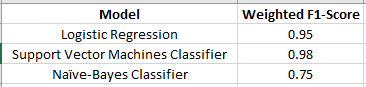



* The weighted average F1-Score of Support Vector Machines Classifier (0.98) ranks the highest compared to other classification models Logistic Regression (0.95) and Naive-Bayes Classifier (0.75).

* Hence, the best classification model useful for performing sentiment analysis of patients concerning their mental health is **Support Vector Machines Classifier**.

### **Improvements that can be made in psychologist-patient interactions based on sentiment analysis:**  



*   Sentiment analysis can detect shifts in patients' emotional states through spoken or written communication (e.g., therapy transcripts, journal entries, or social media posts). This allows psychologists to intervene early if a patient shows signs of worsening mental health, such as depression, anxiety, or suicidal ideation.

*   By analyzing a patient's tone and choice of words over time, psychologists can tailor therapy approaches based on their emotional patterns. Identifying which therapy techniques (e.g., cognitive-behavioral therapy, mindfulness) yield positive emotional responses can improve treatment efficacy.
*   AI-powered sentiment analysis can provide real-time feedback on a patient's emotional state, helping psychologists adjust their approach instantly. For example, if a patient hesitates or shows discomfort when discussing a topic, the psychologist can probe deeper with empathy or change the conversation flow.


*   Patients may not always express their true emotions directly. Sentiment analysis can help uncover hidden distress, allowing psychologists to address underlying issues. It can also improve digital therapy solutions (e.g., chatbots, teletherapy) by making them more responsive and emotionally intelligent.

*   If sentiment analysis detects high-risk emotions (e.g., extreme sadness, hopelessness, anger), it can trigger alerts for immediate intervention. This can be integrated into mental health apps, chatbots, or crisis hotlines to provide timely support.
*   Sentiment analysis can help supervisors assess therapist-patient interactions, providing feedback on areas like empathy, listening skills, and response effectiveness.








